In [1]:
import pandas as pd

siment=pd.read_excel('./수요,발주예측관리_rawdata_봄소프트.xlsx')

In [2]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None


In [4]:
import pandas as pd

receipe = pd.read_excel('./엑셀분리기본파일/생산레시피기본.xlsx', header=1)
receipe.drop('Unnamed: 0',axis=1, inplace =True)

client = pd.read_excel('./엑셀분리기본파일/거래처기본.xlsx', header=1)
client.drop('Unnamed: 0',axis=1, inplace =True)

LOT = pd.read_excel('./엑셀분리기본파일/생산LOT기본.xlsx', header=1)
LOT.drop('Unnamed: 0',axis=1, inplace =True)

sales = pd.read_excel('./엑셀분리기본파일/영업수주기본.xlsx', header=1)
sales.drop('Unnamed: 0',axis=1, inplace =True)

material = pd.read_excel('./엑셀분리기본파일/원자재기본.xlsx', header=1)
material.drop('Unnamed: 0',axis=1, inplace =True)

delivery = pd.read_excel('./엑셀분리기본파일/자재납품기본.xlsx', header=1)
delivery.drop('Unnamed: 0',axis=1, inplace =True)

order = pd.read_excel('./엑셀분리기본파일/자재발주기본.xlsx', header=1)
order.drop('Unnamed: 0',axis=1, inplace =True)

product = pd.read_excel('./엑셀분리기본파일/제품기본.xlsx', header=1)
product.drop('Unnamed: 0',axis=1, inplace =True)

build = pd.read_csv('./엑셀분리기본파일/동수별+연면적별+건축물착공현황_562_384_20221115172902.csv')


In [22]:
build = build[build['월(Monthly)'] <= '2021-12']

In [23]:
build2=build[(build['LEVEL1']=='연면적별')&(build['LEVEL3']=='철근및철골조')|(build['LEVEL3']=='조적조')]

In [24]:
pivot_b=build2[build2['LEVEL1'] == '연면적별'].pivot_table(index = 'LEVEL1',
                                              columns='월(Monthly)',
                                              values='값',
                                              aggfunc='sum')

<AxesSubplot:xlabel='월(Monthly)'>

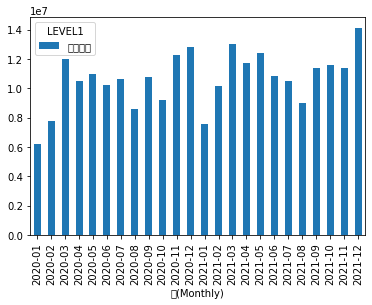

In [25]:
pivot_b.T.plot(kind='bar')

In [26]:
pivot_b=pivot_b.T.reset_index()

In [27]:
pivot_b=pivot_b.rename({'월(Monthly)':'Month'}, axis=1)

In [28]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False


<AxesSubplot:xlabel='Month', ylabel='연면적별'>

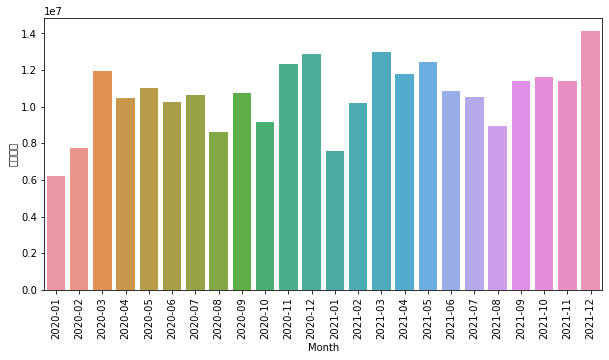

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
plt.rc('font', family='NanumGothic') # For Windows

plt.figure(figsize=(10,5))
plt.xticks(rotation=90)


sns.barplot(x='Month',y='연면적별',data=pivot_b)

In [31]:
pivot_b.to_csv('연면적별.csv')

### 월별 전체 가중치

In [63]:
import numpy as np
pivot_b.describe()

LEVEL1,연면적별
count,2.500000e+01
mean,1.065202e+07
std,1.773034e+06
min,7.233397e+06
25%,9.996998e+06
50%,1.084952e+07
75%,1.161805e+07
max,1.413272e+07


In [66]:
pivot_b[pivot_b['연면적별'] > 1.065202e+07]

pivot_b['log_app']=np.log1p(pivot_b['연면적별'])

In [91]:
from sklearn.preprocessing import StandardScaler
stan = StandardScaler()
fit_m = stan.fit(pivot_b[['연면적별','log_app']])
out=fit_m.transform(pivot_b[['연면적별','log_app']])



array([-0.22838495, -0.13631143])

In [94]:
out_a = pd.DataFrame(out)
pivot_b['가중치']=out_a[1]


In [95]:
pivot_b

LEVEL1,Month,연면적별,log_app,가중치
0,2020-06,10255271,16.143302,-0.136311
1,2020-07,10658885,16.181904,0.086635
2,2020-08,8595586,15.966759,-1.155940
3,2020-09,10775873,16.192820,0.149680
4,2020-10,9195394,16.034213,-0.766358
5,2020-11,12312253,16.326106,0.919472
6,2020-12,12855085,16.369250,1.168654
7,2021-01,7570978,15.839833,-1.889007
8,2021-02,10178609,16.135799,-0.179648
9,2021-03,12996528,16.380193,1.231855


In [78]:
2.84375252e-01

0.284375252

In [22]:
len(LOT['LOT번호'].unique())

1677

In [26]:
receipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12304 entries, 0 to 12303
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   원자재코드                     12304 non-null  object        
 1   생산작업지시구분(생산:A,생산제외:D)     12304 non-null  object        
 2   작업지시타입(일반:WO/재투입:WR)      12304 non-null  object        
 3   사업단위(평택:20000,태안:60000등)  12304 non-null  int64         
 4   생산작업요청일자                  12304 non-null  datetime64[ns]
 5   LOT번호                     12304 non-null  object        
 6   분할순번                      12304 non-null  int64         
 7   제품코드                      12304 non-null  object        
 8   제품BOM차수                   12304 non-null  int64         
 9   원자재투입순번                   12304 non-null  int64         
 10  원자재명                      12304 non-null  object        
 11  원자재탱크번호                   12304 non-null  int64         
 12  투입지시중량            

In [196]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   거래처코드   71 non-null     int64  
 1   거래처명    71 non-null     object 
 2   거래처부서명  71 non-null     object 
 3   대표자명    71 non-null     object 
 4   사업자번호   71 non-null     object 
 5   법인번호    0 non-null      float64
 6   전화번호    61 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.0+ KB


In [197]:
import numpy as np
li = sales['거래처코드'].mode()    

In [198]:
len(client.columns)

7

In [199]:
client[client['거래처코드']==2006606].iloc[0]

거래처코드        2006606
거래처명         삼보지질㈜진안
거래처부서명           총무부
대표자명             박**
사업자번호       617*****
법인번호             NaN
전화번호      63****8084
Name: 56, dtype: object

In [200]:
client[client['거래처코드']==2006606]

,거래처코드,거래처명,거래처부서명,대표자명,사업자번호,법인번호,전화번호
56,2006606,삼보지질㈜진안,총무부,박**,617*****,NaN,63****8084


In [203]:
li2 = []
mode_df = pd.DataFrame(columns=client.columns, index=range(len(li)))
for i in range(len(li)):
    k=client[client['거래처코드']==li[i]].values
    mode_df.loc[i] = k
    


mode_df

,거래처코드,거래처명,거래처부서명,대표자명,사업자번호,법인번호,전화번호
0,2006606,삼보지질㈜진안,총무부,박**,617*****,NaN,63****8084
1,2006609,삼부토건㈜길천,영업부,김**,104*****,NaN,52****7200
2,2006612,엘티삼보㈜제물포,총무부,장**,617*****,NaN,NaN
3,2006700,삼삼건설㈜,총무부,박**,214*****,NaN,32****8400
4,2006800,삼성건설㈜,영업부,최**,213*****,NaN,NaN
5,2006900,삼성물산㈜신갈,총무부,정**,135*****,NaN,31****1683
6,2007000,삼익건설㈜,총무부,이**,120*****,NaN,NaN
7,2007100,삼일공영㈜,총무부,이**,110*****,NaN,31****1473115
8,2007200,삼중건설㈜고철,총무부,김**,609*****,NaN,055)363****
9,2007302,삼지건설㈜,총무부,이**,621*****,NaN,54****8191


In [59]:

product_name=product['제품명'].str.extract(r'([^가-힣()\s]+)')

In [60]:
product_name[0].unique()

array(['ARE-580FX', 'SRE-110', 'CSA5000', 'PEMA-HR1000', 'PEMA-HR1500',
       'PEMA-PR1000', 'CSA4000', 'PEMA-SR2000', 'PEMA-SR3000F',
       'PEMA-PR2000', 'PEMA-HR1000F/A', 'PEMA-PR10001.5%', 'PEMA-580FX',
       'PEMA-SP1000', 'PEMA-PCR3000E', 'PEMA-PCR3000N', 'PEMA-SR5000F',
       'PEMA-CSA5000', 'PEMA-HR1000OPC', 'PEMA-500FR', 'PEMA-PCM2000',
       'PEMA-SR2000A', 'PEMA-CR1000', 'SRE-200', 'PEMA-HR1000F/A15%',
       'PEMA-HR1000S', 'CSA5000F/A', 'PEMA-PCM2000B', 'PR1000',
       'PEMA-SPR', 'PEMA-HR1500F/A', 'AE', 'PEMA-SN400'], dtype=object)

In [5]:
productnm = pd.read_csv('./제품명(수정).csv')
productnm=productnm[['제품코드','제품명']]

In [6]:
sales.columns

Index(['수주번호', '거래처코드', '제품코드', '영업등록구분(계획, 추가)', '수주량', '수주단가', '수주금액',
       '수주예정일자', '수주일자', '납기예정일자', '납기일자', '생산계획확정여부', '자재계획확정여부', '판매수량',
       '진행현황', '적재창고위치', '적재창고위치명', '긴급여부', '비고'],
      dtype='object')

In [7]:
sales_semi = sales[['수주번호','거래처코드', '제품코드','수주량', '수주단가', '수주금액','수주일자','납기일자']]

In [8]:
sales_nm = pd.merge(sales_semi,productnm, on='제품코드', how='outer')
sales_nm

,수주번호,거래처코드,제품코드,수주량,수주단가,수주금액,수주일자,납기일자,제품명
0,580F21022209,2001102,PEMA033101400,15000,1000,15000000,2021-02-22,2021-02-25,PEMA-580FX
1,580F21030830,2007302,PEMA033101400,15000,1349,20235000,2021-03-08,2021-03-11,PEMA-580FX
2,580F21031431,2006600,PEMA033101400,15000,1552,23280000,2021-03-14,2021-03-17,PEMA-580FX
3,580F21032239,2002700,PEMA033101400,15000,1796,26940000,2021-03-22,2021-03-25,PEMA-580FX
4,580F21040709,2006900,PEMA033101400,20000,2268,45360000,2021-04-07,2021-04-10,PEMA-580FX
...,...,...,...,...,...,...,...,...,...
1714,CSA521042117,2006200,PEMA013122800,10000,2684,26840000,2021-04-21,2021-04-24,CSA5000
1715,SN4021042103,2007000,TSN4012011123,10000,2710,27100000,2021-04-21,2021-04-24,PEMA-SN400
1716,SR2021042139,2007400,PEMA043103800,10000,2714,27140000,2021-04-21,2021-04-24,PEMA-SR2000
1717,SR2021042143,2007500,PEMA023122400,8000,2715,21720000,2021-04-21,2021-04-24,PEMA-SR2000


In [11]:
sales_nm.sort_values('수주일자')['수주일자'].unique()

array(['2021-02-21T00:00:00.000000000', '2021-02-22T00:00:00.000000000',
       '2021-02-23T00:00:00.000000000', '2021-02-24T00:00:00.000000000',
       '2021-02-25T00:00:00.000000000', '2021-02-26T00:00:00.000000000',
       '2021-02-28T00:00:00.000000000', '2021-03-01T00:00:00.000000000',
       '2021-03-02T00:00:00.000000000', '2021-03-03T00:00:00.000000000',
       '2021-03-04T00:00:00.000000000', '2021-03-05T00:00:00.000000000',
       '2021-03-07T00:00:00.000000000', '2021-03-08T00:00:00.000000000',
       '2021-03-09T00:00:00.000000000', '2021-03-10T00:00:00.000000000',
       '2021-03-11T00:00:00.000000000', '2021-03-12T00:00:00.000000000',
       '2021-03-14T00:00:00.000000000', '2021-03-15T00:00:00.000000000',
       '2021-03-16T00:00:00.000000000', '2021-03-17T00:00:00.000000000',
       '2021-03-18T00:00:00.000000000', '2021-03-19T00:00:00.000000000',
       '2021-03-21T00:00:00.000000000', '2021-03-22T00:00:00.000000000',
       '2021-03-23T00:00:00.000000000', '2021-03-24

In [6]:
product_name= sales_nm['제품명'].unique()

In [19]:
li = []
for i in product_name:
    df=sales_nm[sales_nm['제품명']==i]
    li.append(df)


In [20]:

for i in li:
    print(len(i), i['제품명'].iloc[0])

64 PEMA-580FX
47 AE
252 CSA5000
625 PEMA-HR1000
224 PEMA-HR1500
1 ARE-580FX
86 PEMA-PR1000
119 PEMA-SR2000
80 PEMA-SR3000F
31 PEMA-500FR
8 PEMA-CR1000
22 CSA4000
3 PEMA-CSA5000
32 PEMA-SN400
17 PEMA-SR2000A
31 PEMA-PCM2000
18 PEMA-PCM2000B
2 SRE-110
36 PEMA-PR2000
6 PEMA-PCR3000E
3 PR1000
3 PEMA-SR5000F
2 PEMA-PCR3000N
4 PEMA-SP1000
1 SRE-200
1 PEMA-SPR
1 PEMA-HR1000S


In [1]:
sales_semi

NameError: name 'sales_semi' is not defined

In [416]:
import pandas as pd

sale_df21 = pd.read_csv('./영업수주_2021_1년.csv', index_col=0)
sale_df20 = pd.read_csv('./영업수주_2020_1년.csv', index_col=0)
add_mi = pd.read_csv('./시멘트2년 국내출하(월별증감율).csv')
sale_df21

,거래처코드,제품코드,수주량,수주단가,수주금액,수주일자,납기일자
0,2001102,PEMA033101400,15000,1000,15000000,2021-01-01,2021-01-04
1,2001200,PEMA023098200,20000,1001,20020000,2021-01-01,2021-01-04
2,2001300,SSA073046500,2000,1002,2004000,2021-01-01,2021-01-04
3,2001400,PEMA043099800,10000,1003,10030000,2021-01-01,2021-01-04
4,2001500,PEMA013120000,10000,1004,10040000,2021-01-01,2021-01-04
...,...,...,...,...,...,...,...
1714,2007400,PEMA043103800,10000,2714,27140000,2021-12-31,2022-01-03
1715,2007500,PEMA023122400,8000,2715,21720000,2021-12-31,2022-01-03
1716,2007600,PEMA353048300,7000,2716,19012000,2021-12-31,2022-01-03
1717,2007700,TSN4012011125,10000,2717,27170000,2021-12-31,2022-01-03


In [417]:
sale_1=sale_df21[(sale_df21['수주일자'] >= '2021-01-01')&(sale_df21['수주일자'] < '2021-02-01')]


In [430]:
add_20=add_mi.iloc[:12]
add_21=add_mi.iloc[12:]

In [419]:
add_20['월별증감율']

0     0.000000
1     0.156435
2     0.413176
3     0.046617
4    -0.121081
5     0.055105
6    -0.174400
7    -0.145439
8     0.344679
9     0.068321
10    0.056821
11   -0.051807
Name: 월별증감율, dtype: float64

In [420]:
add_21['portion'] = add_21['내수계']/add_21['내수계'].sum()
add_21

,월,월별,내수계,월별증감율,portion
12,13,1월,2746,-0.369605,0.055628
13,14,2월,3027,0.102331,0.061320
14,15,3월,4684,0.547407,0.094887
15,16,4월,4902,0.046541,0.099303
16,17,5월,4335,-0.115667,0.087817
17,18,6월,4388,0.012226,0.088891
18,19,7월,4223,-0.037603,0.085548
19,20,8월,3493,-0.172863,0.070760
20,21,9월,3601,0.030919,0.072948
21,22,10월,4461,0.238823,0.090370


In [421]:
add_li=list(add_21['portion'])

In [431]:
li = []
for i in add_li:
    li.append(len(sale_df21)*i)
li

[580.4181994976096,
 639.8127785430678,
 990.0505631634389,
 1036.1289198606273,
 916.2829187261972,
 927.4854549874403,
 892.6096345514951,
 738.3105501985252,
 761.1383599384166,
 942.9153634227373,
 1013.3011101207358,
 995.5461469897092]

In [432]:
# df = pd.DataFrame(index=[i for i in range(0,12)], columns = ['년도별수주량'], data = li)
# df['년도별수주량'] = df['년도별수주량'].round()

In [433]:
# df['년도별수주량'] = df['년도별수주량'] *  len(sale_3)/df['년도별수주량'][2]
# df['년도별수주량'] = df['년도별수주량'].round()

# 다시 돌릴 때 여기서부터 돌리면 됨

In [ ]:
import pandas as pd

sale_df21 = pd.read_csv('./영업수주_2021_1년.csv', index_col=0)
sale_df20 = pd.read_csv('./영업수주_2020_1년.csv', index_col=0)
add_mi = pd.read_csv('./시멘트2년 국내출하(월별증감율).csv')
sale_df21

In [77]:
add_21=add_mi.iloc[12:]
add_21=add_21[['월','내수계']]

In [78]:
add_21['월'] = add_21['월'] -12

In [79]:
add_21

,월,내수계
12,1,2746
13,2,3027
14,3,4684
15,4,4902
16,5,4335
17,6,4388
18,7,4223
19,8,3493
20,9,3601
21,10,4461


In [80]:
winter=add_21[(add_21['월']== 1)|(add_21['월']== 2)|(add_21['월']== 12)]['내수계'].sum()
spring=add_21[(add_21['월']== 3)|(add_21['월']== 4)|(add_21['월']== 5)]['내수계'].sum()
summer=add_21[(add_21['월']== 6)|(add_21['월']== 7)|(add_21['월']== 8)]['내수계'].sum()
fall=add_21[(add_21['월']== 9)|(add_21['월']== 10)|(add_21['월']== 11)]['내수계'].sum()

In [81]:
print(spring)
print(summer)
print(fall)
print(winter)

13921
12104
12856
10483


In [82]:
# 계절 별 외부 데이터 다시 원본 데이터와 맞춤
p=len(sale_spring)/spring

In [83]:
spring = round(spring*p)
summer=round(summer*p)
fall = round(fall*p)
winter = round(winter*p)

In [84]:
print(spring)
print(summer)
print(fall)
print(winter)

2626
2283
2425
1977


In [85]:
spring+summer+fall+winter

9311

In [444]:
len(sale_df21)

10434

In [33]:
import pandas as pd

sale_df21 = pd.read_csv('./영업수주_2021_1년.csv', index_col=0)
sale_df20 = pd.read_csv('./영업수주_2020_1년.csv', index_col=0)
add_mi = pd.read_csv('./시멘트2년 국내출하(월별증감율).csv')
sale_df21

,거래처코드,제품코드,수주량,수주단가,수주금액,수주일자,납기일자
0,2001102,PEMA033101400,15000,1000,15000000,2021-01-01,2021-01-04
1,2001200,PEMA023098200,20000,1001,20020000,2021-01-01,2021-01-04
2,2001300,SSA073046500,2000,1002,2004000,2021-01-01,2021-01-04
3,2001400,PEMA043099800,10000,1003,10030000,2021-01-01,2021-01-04
4,2001500,PEMA013120000,10000,1004,10040000,2021-01-01,2021-01-04
...,...,...,...,...,...,...,...
1714,2007400,PEMA043103800,10000,2714,27140000,2021-12-31,2022-01-03
1715,2007500,PEMA023122400,8000,2715,21720000,2021-12-31,2022-01-03
1716,2007600,PEMA353048300,7000,2716,19012000,2021-12-31,2022-01-03
1717,2007700,TSN4012011125,10000,2717,27170000,2021-12-31,2022-01-03


In [34]:
productnm = pd.read_csv('./제품명(수정).csv')
productnm=productnm[['제품코드','제품명']]

In [447]:
# sale_original=sale_df21[(sale_df21['수주일자'] > '2021-02-21')&(sale_df21['수주일자'] < '2021-04-22')]

In [428]:
# all_p_dic = {}
# for i in list(sale_original['제품명'].unique()):
#     name_cnt =  len(sale_original[sale_original['제품명']==i])
#     all_p_dic[i] = round(name_cnt/len(sale_original),4)


In [448]:
# sale_1=sale_df21[(sale_df21['수주일자'] >= '2021-01-01')&(sale_df21['수주일자'] < '2021-02-01')]
# sale_2=sale_df21[(sale_df21['수주일자'] >= '2021-02-01')&(sale_df21['수주일자'] < '2021-03-01')]
# sale_3=sale_df21[(sale_df21['수주일자'] >= '2021-03-01')&(sale_df21['수주일자'] < '2021-04-01')]
# sale_4=sale_df21[(sale_df21['수주일자'] >= '2021-04-01')&(sale_df21['수주일자'] < '2021-05-01')]
# sale_5=sale_df21[(sale_df21['수주일자'] >= '2021-05-01')&(sale_df21['수주일자'] < '2021-06-01')]
# sale_6=sale_df21[(sale_df21['수주일자'] >= '2021-06-01')&(sale_df21['수주일자'] < '2021-07-01')]
# sale_7=sale_df21[(sale_df21['수주일자'] >= '2021-07-01')&(sale_df21['수주일자'] < '2021-08-01')]
# sale_8=sale_df21[(sale_df21['수주일자'] >= '2021-08-01')&(sale_df21['수주일자'] < '2021-09-01')]
# sale_9=sale_df21[(sale_df21['수주일자'] >= '2021-09-01')&(sale_df21['수주일자'] < '2021-10-01')]
# sale_10=sale_df21[(sale_df21['수주일자'] >= '2021-10-01')&(sale_df21['수주일자'] < '2021-11-01')]
# sale_11=sale_df21[(sale_df21['수주일자'] >= '2021-11-01')&(sale_df21['수주일자'] < '2021-12-01')]
# sale_12=sale_df21[(sale_df21['수주일자'] >= '2021-12-01')&(sale_df21['수주일자'] < '2022-01-01')]



In [35]:
sale_df21 = pd.merge(sale_df21,productnm, on='제품코드', how='outer')

In [36]:
sale_winter=sale_df21[(sale_df21['수주일자'] >= '2021-01-01')&(sale_df21['수주일자'] < '2021-03-01')|(sale_df21['수주일자'] >= '2021-12-01')&(sale_df21['수주일자'] < '2022-01-01')]
sale_spring=sale_df21[(sale_df21['수주일자'] >= '2021-03-01')&(sale_df21['수주일자'] < '2021-06-01')]
sale_summer=sale_df21[(sale_df21['수주일자'] >= '2021-06-01')&(sale_df21['수주일자'] < '2021-09-01')]
sale_fall=sale_df21[(sale_df21['수주일자'] >= '2021-09-01')&(sale_df21['수주일자'] < '2021-12-01')]

In [37]:
len(sale_fall)

2626

In [38]:
winter

1977

In [39]:
len(sale_winter) -winter

673

In [40]:
len(sale_summer) -summer

248

In [41]:
len(sale_fall) -fall

201

#### Sale_winter 증식 데이터 없애기

In [42]:
# 증식된 데이터 날짜 별 하나 씩 없애기
# 제품 건수는 2개 이상 살리기
# 원본이 포함된 sale_spring은 건들지 않음

# 겨울 차이 673
import warnings
warnings.filterwarnings('ignore')

li=[]         
for i,p in zip(list(sale_winter['수주일자'].unique()), list(sale_winter['제품명'].unique())):
    k = sale_winter[sale_winter['수주일자'] == i].index
    pro = sale_winter[sale_winter['제품명'] == p]
    if len(pro) > 2:
        j=list(k[0:30])
        li.append(j)
            
            
li2=[]
for i in li:
    for j in i:
        li2.append(j)
len(li2)

662

In [43]:
sale_winter.drop(li2, inplace=True)

In [44]:
sale_winter

,거래처코드,제품코드,수주량,수주단가,수주금액,수주일자,납기일자,제품명
5,2001300,PEMA033101400,20000,2493,49860000,2021-02-21,2021-02-24,PEMA-580FX
45,2003300,PEMA023098200,20000,2441,48820000,2021-02-21,2021-02-24,PEMA-580FX
104,2005300,PEMA023098200,20000,2675,53500000,2021-12-31,2022-01-03,PEMA-580FX
107,2005700,SSA073046500,1000,1188,1188000,2021-01-11,2021-01-14,AE
109,2005600,SSA073046500,2000,1471,2942000,2021-01-21,2021-01-24,AE
...,...,...,...,...,...,...,...,...
10421,2007400,PEMA043103800,10000,2714,27140000,2021-12-31,2022-01-03,PEMA-SR2000
10426,2007500,PEMA023122400,8000,2715,21720000,2021-12-21,2021-12-24,PEMA-SR2000
10427,2007500,PEMA023122400,8000,2715,21720000,2021-12-31,2022-01-03,PEMA-SR2000
10432,2007700,TSN4012011125,10000,2717,27170000,2021-12-21,2021-12-24,PEMA-SN400


In [45]:
len(sale_winter['제품명'].unique())

27

In [46]:
# 여름 차이 248
li=[]         
for i,p in zip(list(sale_summer['수주일자'].unique()), list(sale_summer['제품명'].unique())):
    k = sale_summer[sale_summer['수주일자'] == i].index
    pro = sale_summer[sale_summer['제품명'] == p]
    if len(pro) > 4:
        j=list(k[0:13])
        li.append(j)
            
            
li2=[]
for i in li:
    for j in i:
        li2.append(j)
len(li2)

234

In [47]:
sale_summer.drop(li2, inplace=True)

In [48]:
len(sale_summer)

2297

In [49]:
len(sale_summer['제품명'].unique())

27

In [50]:
# 가을 차이 201
li=[]         
for i,p in zip(list(sale_fall['수주일자'].unique()), list(sale_fall['제품명'].unique())):
    k = sale_fall[sale_fall['수주일자'] == i].index
    pro = sale_fall[sale_fall['제품명'] == p]
    if len(pro) > 4:
        j=list(k[0:10])
        li.append(j)
            
            
li2=[]
for i in li:
    for j in i:
        li2.append(j)
len(li2)

200

In [51]:
sale_fall.drop(li2, inplace=True)

In [52]:
len(sale_fall)

2426

In [53]:
len(sale_fall['제품명'].unique())

27

In [54]:
# 데이터 다시 합치기

from functools import reduce

df_list = [sale_winter,sale_spring,sale_summer,sale_fall]

df_2021=reduce(lambda x,y : pd.concat([x,y]),df_list)

In [55]:
df_2021.sort_values('수주일자')

,거래처코드,제품코드,수주량,수주단가,수주금액,수주일자,납기일자,제품명
1064,2004200,PEMA043080500,2000,1031,2062000,2021-01-01,2021-01-04,PEMA-SR2000
1130,2004400,PEMA063030500,3000,1033,3099000,2021-01-01,2021-01-04,PEMA-SR3000F
1161,2004500,PEMA023030801,6000,1034,6204000,2021-01-01,2021-01-04,PEMA-SR3000F
1081,2004300,PEMA043062000,6000,1032,6192000,2021-01-01,2021-01-04,PEMA-SR2000
1851,2006300,PEMA033088300,10000,1052,10520000,2021-01-01,2021-01-04,PEMA-HR1000
...,...,...,...,...,...,...,...,...
8595,2007302,PEMA053041502,6000,2713,16278000,2021-12-31,2022-01-03,PEMA-SR2000
880,2007600,PEMA053046500,4000,2701,10804000,2021-12-31,2022-01-03,PEMA-HR1500
1007,2006609,PEMA023129801,3000,2705,8115000,2021-12-31,2022-01-03,PEMA-PR1000
104,2005300,PEMA023098200,20000,2675,53500000,2021-12-31,2022-01-03,PEMA-580FX


In [472]:
df_2021.to_csv('2021년_증식데이터_편집.csv')

## 20년도 데이터 증식 편집

In [56]:
sale_df20

,거래처코드,제품코드,수주량,수주단가,수주금액,수주일자,납기일자
0,2001102,PEMA033101400,15000,1000,15000000,2020-01-01,2020-01-04
1,2001200,PEMA023098200,20000,1001,20020000,2020-01-01,2020-01-04
2,2001300,SSA073046500,2000,1002,2004000,2020-01-01,2020-01-04
3,2001400,PEMA043099800,10000,1003,10030000,2020-01-01,2020-01-04
4,2001500,PEMA013120000,10000,1004,10040000,2020-01-01,2020-01-04
...,...,...,...,...,...,...,...
1714,2007400,PEMA043103800,10000,2714,27140000,2020-12-31,2021-01-03
1715,2007500,PEMA023122400,8000,2715,21720000,2020-12-31,2021-01-03
1716,2007600,PEMA353048300,7000,2716,19012000,2020-12-31,2021-01-03
1717,2007700,TSN4012011125,10000,2717,27170000,2020-12-31,2021-01-03


In [57]:
sale_df20 = pd.merge(sale_df20,productnm, on='제품코드', how='outer')

In [58]:
sale_df20

,거래처코드,제품코드,수주량,수주단가,수주금액,수주일자,납기일자,제품명
0,2001102,PEMA033101400,15000,1000,15000000,2020-01-01,2020-01-04,PEMA-580FX
1,2007302,PEMA033101400,15000,1349,20235000,2020-01-18,2020-01-21,PEMA-580FX
2,2006600,PEMA033101400,15000,1552,23280000,2020-01-24,2020-01-27,PEMA-580FX
3,2002700,PEMA033101400,15000,1796,26940000,2020-02-01,2020-02-04,PEMA-580FX
4,2006900,PEMA033101400,20000,2268,45360000,2020-02-14,2020-02-17,PEMA-580FX
...,...,...,...,...,...,...,...,...
10429,2007700,TSN4012011125,10000,2717,27170000,2020-06-21,2020-06-24,PEMA-SN400
10430,2007700,TSN4012011125,10000,2717,27170000,2020-08-21,2020-08-24,PEMA-SN400
10431,2007700,TSN4012011125,10000,2717,27170000,2020-10-21,2020-10-24,PEMA-SN400
10432,2007700,TSN4012011125,10000,2717,27170000,2020-12-21,2020-12-24,PEMA-SN400


In [59]:
sale_winter_20=sale_df20[(sale_df20['수주일자'] >= '2020-01-01')&(sale_df20['수주일자'] < '2020-03-01')|(sale_df20['수주일자'] >= '2020-12-01')&(sale_df20['수주일자'] < '2021-01-01')]
sale_spring_20=sale_df20[(sale_df20['수주일자'] >= '2020-03-01')&(sale_df20['수주일자'] < '2020-06-01')]
sale_summer_20=sale_df20[(sale_df20['수주일자'] >= '2020-06-01')&(sale_df20['수주일자'] < '2020-09-01')]
sale_fall_20=sale_df20[(sale_df20['수주일자'] >= '2020-09-01')&(sale_df20['수주일자'] < '2020-12-01')]

In [60]:
sale_winter_20

,거래처코드,제품코드,수주량,수주단가,수주금액,수주일자,납기일자,제품명
0,2001102,PEMA033101400,15000,1000,15000000,2020-01-01,2020-01-04,PEMA-580FX
1,2007302,PEMA033101400,15000,1349,20235000,2020-01-18,2020-01-21,PEMA-580FX
2,2006600,PEMA033101400,15000,1552,23280000,2020-01-24,2020-01-27,PEMA-580FX
3,2002700,PEMA033101400,15000,1796,26940000,2020-02-01,2020-02-04,PEMA-580FX
4,2006900,PEMA033101400,20000,2268,45360000,2020-02-14,2020-02-17,PEMA-580FX
...,...,...,...,...,...,...,...,...
10421,2007400,PEMA043103800,10000,2714,27140000,2020-12-31,2021-01-03,PEMA-SR2000
10426,2007500,PEMA023122400,8000,2715,21720000,2020-12-21,2020-12-24,PEMA-SR2000
10427,2007500,PEMA023122400,8000,2715,21720000,2020-12-31,2021-01-03,PEMA-SR2000
10432,2007700,TSN4012011125,10000,2717,27170000,2020-12-21,2020-12-24,PEMA-SN400


### 외부데이터 2020년도 편집

In [61]:
add_20=add_mi.iloc[:12]

In [62]:
add_20=add_20[['월','내수계']]

In [63]:
add_20

,월,내수계
0,1,2704
1,2,3127
2,3,4419
3,4,4625
4,5,4065
5,6,4289
6,7,3541
7,8,3026
8,9,4069
9,10,4347


In [64]:
add_21=add_mi.iloc[12:]
add_21['내수계'].sum()

49364

In [65]:
add_20['내수계'].sum()

47162

In [66]:
winter=add_20[(add_20['월']== 1)|(add_20['월']== 2)|(add_20['월']== 12)]['내수계'].sum()
spring=add_20[(add_20['월']== 3)|(add_20['월']== 4)|(add_20['월']== 5)]['내수계'].sum()
summer=add_20[(add_20['월']== 6)|(add_20['월']== 7)|(add_20['월']== 8)]['내수계'].sum()
fall=add_20[(add_20['월']== 9)|(add_20['월']== 10)|(add_20['월']== 11)]['내수계'].sum()

In [67]:
# 계절 별 외부 데이터 다시 원본 데이터와 맞춤
p=len(sale_spring_20)/spring

In [68]:
p

0.2003203905713632

In [69]:
spring = round(spring*p)
summer=round(summer*p)
fall = round(fall*p)
winter = round(winter*p)

In [70]:
print(spring)
print(summer)
print(fall)
print(winter)

2626
2175
2606
2041


In [73]:
spring+summer+fall+winter

9448

In [71]:
print('2020 겨울 외부 원본 차이 : ', len(sale_winter_20) - winter)

2020 겨울 외부 원본 차이 :  609


In [576]:
# 증식된 데이터 날짜 별 하나 씩 없애기
# 제품 건수는 2개 이상 살리기
# 원본이 포함된 sale_spring은 건들지 않음

import warnings
warnings.filterwarnings('ignore')

li=[]         
for i,p in zip(list(sale_winter_20['수주일자'].unique()), list(sale_winter_20['제품명'].unique())):
    k = sale_winter_20[sale_winter_20['수주일자'] == i].index
    pro = sale_winter_20[sale_winter_20['제품명'] == p]
    if len(pro) > 2:
        j=list(k[0:27])
        li.append(j)
            
            
li2=[]
for i in li:
    for j in i:
        li2.append(j)
len(li2)

599

In [577]:
sale_winter_20.drop(li2, inplace=True)

In [578]:
len(sale_winter_20)

2051

In [579]:
len(sale_winter_20['제품명'].unique())

27

In [580]:
print('2020 여름 외부 원본 차이 : ', len(sale_summer_20) - summer)

2020 여름 외부 원본 차이 :  356


In [581]:
# 증식된 데이터 날짜 별 하나 씩 없애기
# 제품 건수는 2개 이상 살리기
# 원본이 포함된 sale_spring은 건들지 않음

import warnings
warnings.filterwarnings('ignore')

li=[]         
for i,p in zip(list(sale_summer_20['수주일자'].unique()), list(sale_summer_20['제품명'].unique())):
    k = sale_summer_20[sale_summer_20['수주일자'] == i].index
    pro = sale_summer_20[sale_summer_20['제품명'] == p]
    if len(pro) > 4:
        j=list(k[0:20])
        li.append(j)
            
            
li2=[]
for i in li:
    for j in i:
        li2.append(j)
len(li2)

352

In [582]:
# sale_summer_20.drop(li2)
sale_summer_20.drop(li2, inplace=True)

In [583]:
len(sale_summer_20)

2179

In [584]:
len(sale_summer_20['제품명'].unique())

27

In [585]:
print('2020 가을 외부 원본 차이 : ', len(sale_fall_20) - fall)

2020 가을 외부 원본 차이 :  20


In [586]:
# 증식된 데이터 날짜 별 하나 씩 없애기
# 제품 건수는 2개 이상 살리기
# 원본이 포함된 sale_spring은 건들지 않음
# k(날짜 별 데이터프레임)
# pro(제품별 데이터 프레임)
# 두 개의 갯수를 조정해서 리스트를 만듦
# k의 경우 인덱스를 가져와서 임의로 인덱싱함
# pro의 경우 각 제품별 데이터 프레임의 최소 갯수를 임의로 정해줌


import warnings
warnings.filterwarnings('ignore')

li=[]         
for i,p in zip(list(sale_fall_20['수주일자'].unique()), list(sale_fall_20['제품명'].unique())):
    k = sale_fall_20[sale_fall_20['수주일자'] == i].index
    pro = sale_fall_20[sale_fall_20['제품명'] == p]
    if len(pro) > 2:
        j=list(k[0:1])
        li.append(j)
            
            
li2=[]
for i in li:
    for j in i:
        li2.append(j)
len(li2)

22

In [587]:
# sale_fall_20.drop(li2)
sale_fall_20.drop(li2, inplace=True)

In [588]:
len(sale_fall_20)

2604

In [589]:
len(sale_fall_20['제품명'].unique())

27

In [590]:
# 데이터 다시 합치기

from functools import reduce

df_list = [sale_winter_20,sale_spring_20,sale_summer_20,sale_fall_20]

df_2020=reduce(lambda x,y : pd.concat([x,y]),df_list)

In [591]:
df_2020

,거래처코드,제품코드,수주량,수주단가,수주금액,수주일자,납기일자,제품명
5,2001300,PEMA033101400,20000,2493,49860000,2020-02-21,2020-02-24,PEMA-580FX
45,2003300,PEMA023098200,20000,2441,48820000,2020-02-21,2020-02-24,PEMA-580FX
104,2005300,PEMA023098200,20000,2675,53500000,2020-12-31,2021-01-03,PEMA-580FX
107,2005700,SSA073046500,1000,1188,1188000,2020-01-11,2020-01-14,AE
109,2005600,SSA073046500,2000,1471,2942000,2020-01-21,2020-01-24,AE
...,...,...,...,...,...,...,...,...
10407,2006200,PEMA013122800,10000,2684,26840000,2020-10-21,2020-10-24,CSA5000
10413,2007000,TSN4012011123,10000,2710,27100000,2020-10-21,2020-10-24,PEMA-SN400
10419,2007400,PEMA043103800,10000,2714,27140000,2020-10-21,2020-10-24,PEMA-SR2000
10425,2007500,PEMA023122400,8000,2715,21720000,2020-10-21,2020-10-24,PEMA-SR2000


In [592]:
df_2020.to_csv('2020년_증식데이터_편집.csv')

ㅠ

In [10]:
import pandas as pd
df_2020 = pd.read_csv('2020년_증식데이터_편집.csv', index_col=0)
df_2020

df_2021 = pd.read_csv('2021년_증식데이터_편집.csv', index_col=0)
df_2021

,거래처코드,제품코드,수주량,수주단가,수주금액,수주일자,납기일자,제품명
5,2001300,PEMA033101400,20000,2493,49860000,2021-02-21,2021-02-24,PEMA-580FX
45,2003300,PEMA023098200,20000,2441,48820000,2021-02-21,2021-02-24,PEMA-580FX
104,2005300,PEMA023098200,20000,2675,53500000,2021-12-31,2022-01-03,PEMA-580FX
107,2005700,SSA073046500,1000,1188,1188000,2021-01-11,2021-01-14,AE
109,2005600,SSA073046500,2000,1471,2942000,2021-01-21,2021-01-24,AE
...,...,...,...,...,...,...,...,...
10407,2006200,PEMA013122800,10000,2684,26840000,2021-10-21,2021-10-24,CSA5000
10413,2007000,TSN4012011123,10000,2710,27100000,2021-10-21,2021-10-24,PEMA-SN400
10419,2007400,PEMA043103800,10000,2714,27140000,2021-10-21,2021-10-24,PEMA-SR2000
10425,2007500,PEMA023122400,8000,2715,21720000,2021-10-21,2021-10-24,PEMA-SR2000


In [11]:
df_2020

,거래처코드,제품코드,수주량,수주단가,수주금액,수주일자,납기일자,제품명
5,2001300,PEMA033101400,20000,2493,49860000,2020-02-21,2020-02-24,PEMA-580FX
45,2003300,PEMA023098200,20000,2441,48820000,2020-02-21,2020-02-24,PEMA-580FX
104,2005300,PEMA023098200,20000,2675,53500000,2020-12-31,2021-01-03,PEMA-580FX
107,2005700,SSA073046500,1000,1188,1188000,2020-01-11,2020-01-14,AE
109,2005600,SSA073046500,2000,1471,2942000,2020-01-21,2020-01-24,AE
...,...,...,...,...,...,...,...,...
10407,2006200,PEMA013122800,10000,2684,26840000,2020-10-21,2020-10-24,CSA5000
10413,2007000,TSN4012011123,10000,2710,27100000,2020-10-21,2020-10-24,PEMA-SN400
10419,2007400,PEMA043103800,10000,2714,27140000,2020-10-21,2020-10-24,PEMA-SR2000
10425,2007500,PEMA023122400,8000,2715,21720000,2020-10-21,2020-10-24,PEMA-SR2000
